In [86]:
from rdkit import Chem

# import AllChem which strictly extends functionality of Chem
from rdkit.Chem import AllChem, Draw

In [24]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromSmiles('C1OC1')

In [25]:
m.GetBonds()[0]

In [26]:
m.GetNumAtoms()

3

In [27]:
m.GetNumHeavyAtoms()

3

In [28]:
for atom in m.GetAtoms():
    print(atom.GetSymbol())
    print("Neigbors:", [x.GetAtomicNum() for x in atom.GetNeighbors()])

C
Neigbors: [8, 6]
O
Neigbors: [6, 6]
C
Neigbors: [8, 6]


In [40]:
m = Chem.MolFromSmiles('c1nccc2n1ccc2')
template = Chem.MolFromSmiles('c1nccc2n1ccc2')

Need for sanitization:

In [75]:
fake_mol = Chem.MolFromSmiles('c1ccncc1')

In [76]:
fake_mol

In [78]:
fake_mol.GetAtomWithIdx(0).SetAtomicNum(8)

In [79]:
Chem.SanitizeMol(fake_mol)

ValueError: Sanitization error: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5


In [73]:
#Draw.MolToImage(fake_mol)

### Drawing

In [42]:
AllChem.Compute2DCoords(m)

0

In [46]:
# AllChem.GenerateDepictionMatching2DStructure(m,template)

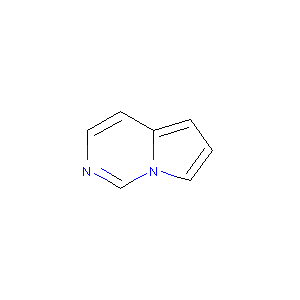

In [52]:
Draw.MolToImage(m)

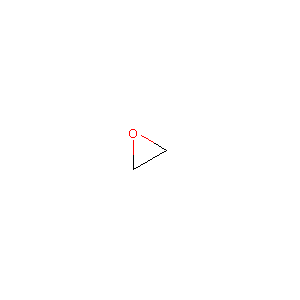

In [48]:
Draw.MolToImage(Chem.MolFromSmiles('C1OC1'))

### Daylight SMARTS

This is a representation of molecules used for searching and other purposes. Basically this is a regex on SMILES.

### Molecular similarity with fingerprints

### Doing reaction prediction

Needs to specify a template given by grammar `reactants>>product`, `reactants` and `products` are molecules in SMARTS form, molecules arer separated by `.` Running a reaction, feed two Molecules that fit the SMARTS.

In [59]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))

In [60]:
len(ps)

4

In [62]:
AllChem.MolToSmiles(ps[0][0])

'NC1=CCCC(O)C1'

In [66]:
ps[3]

(<rdkit.Chem.rdchem.Mol at 0x11f7e88c8>,)

In [83]:
# example of mismatching Mols vs SMARTS
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OCC'), Chem.MolFromSmiles('C=CC(N)=C')))

In [84]:
len(ps)

0

In [85]:
Chem.SanitizeMol(Chem.MolFromSmiles('OCC'))

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

## Molecule properties

* `rdkit.Chem.Crippen.MolLogP` - LogP
* `rdkit.Chem.QED.QEDproperties`
* `sasscorer.py`: https://github.com/kevinid/molecule_generator/blob/master/rdkit_contrib/sascorer.py

In [1]:
import rdkit_contrib

ModuleNotFoundError: No module named 'sascorer'